## TP Graphes

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [31]:
# Fonction pour calculer la distance entre deux satellites
def calculate_distance(sat1, sat2):
    return np.sqrt((sat1['x'] - sat2['x'])**2 + (sat1['y'] - sat2['y'])**2 + (sat1['z'] - sat2['z'])**2)

# Fonction pour créer les connexions entre satellites en fonction de la portée
def create_connections(data, range_km):
    connections = []
    for i, sat1 in data.iterrows():
        for j, sat2 in data.iterrows():
            if i < j:
                distance = calculate_distance(sat1, sat2)
                if distance/1000 <= range_km:
                    connections.append((sat1['sat_id'], sat2['sat_id']))
    return connections

In [32]:
# Fonction pour afficher le graphe en 3D
def plot_graph_3d(data, connections, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Afficher les satellites (points)
    ax.scatter(data['x'], data['y'], data['z'], c='b', s=20, label="Satellites")
    
    # Afficher les connexions (arêtes)
    for conn in connections:
        sat1 = data[data['sat_id'] == conn[0]].iloc[0]
        sat2 = data[data['sat_id'] == conn[1]].iloc[0]
        ax.plot([sat1['x'], sat2['x']], [sat1['y'], sat2['y']], [sat1['z'], sat2['z']], c='r', alpha=0.5)
    
    ax.set_title(title)
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    plt.legend()
    plt.show()

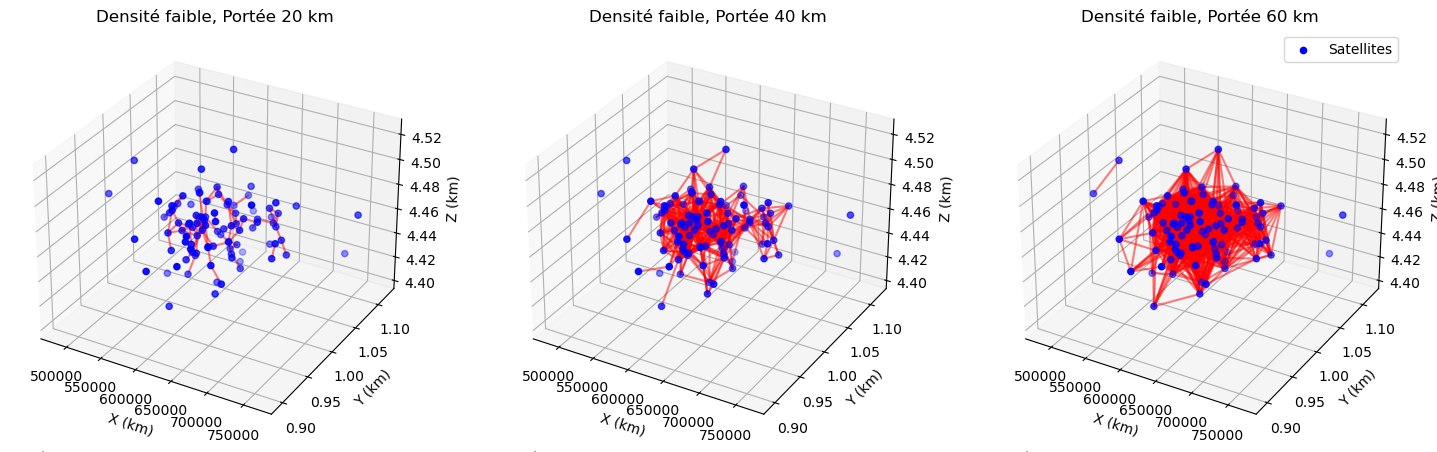

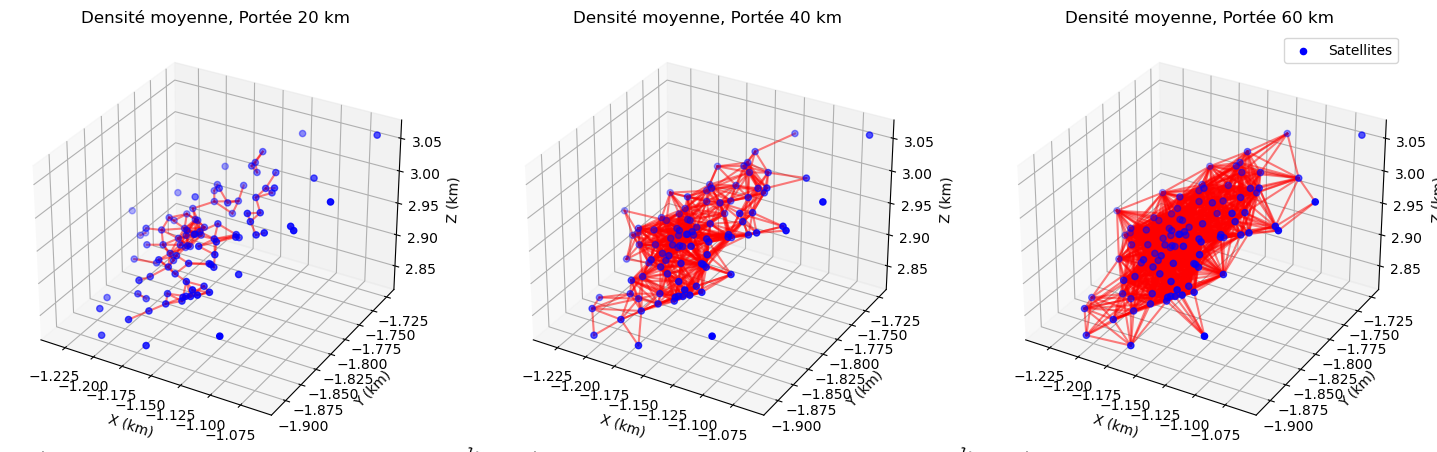

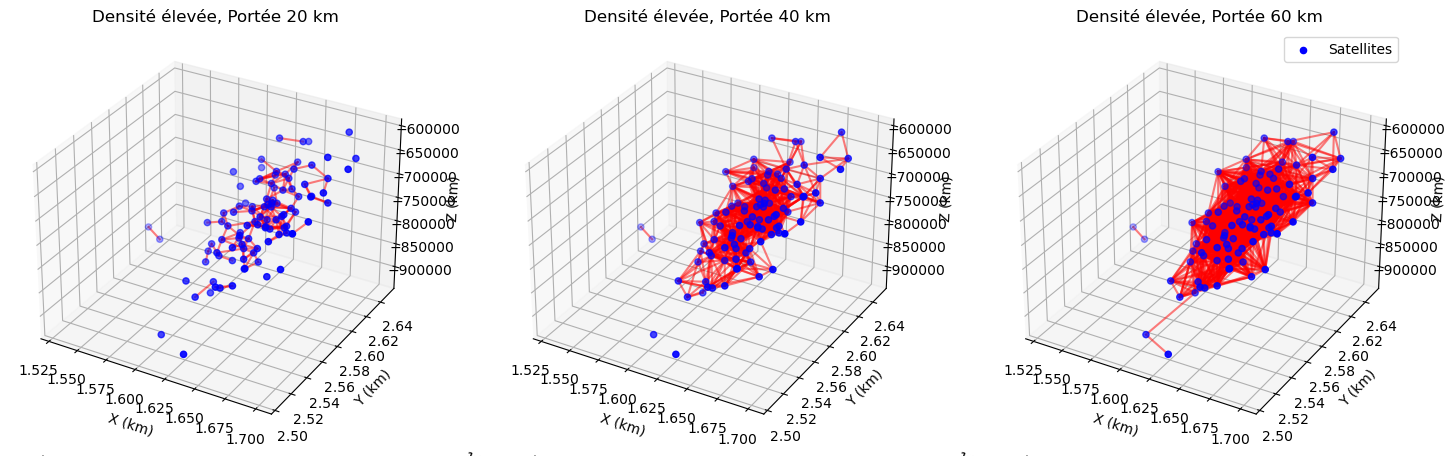

In [33]:
file_path_avg = 'Topologies-20250110/topology_avg.csv'
data_avg = pd.read_csv(file_path_avg)

file_path_low = 'Topologies-20250110/topology_low.csv'
data_low = pd.read_csv(file_path_low)

file_path_high = 'Topologies-20250110/topology_high.csv'
data_high = pd.read_csv(file_path_high)

# Créer les connexions pour différentes portées et afficher les graphes
datasets = {'Densité faible': data_low, 'Densité moyenne': data_avg, 'Densité élevée': data_high}
ranges_km = [20, 40, 60]

for density, data in datasets.items():
    fig = plt.figure(figsize=(18, 6))
    for i, range_km in enumerate(ranges_km):
        connections = create_connections(data, range_km)
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        ax.scatter(data['x'], data['y'], data['z'], c='b', s=20, label="Satellites")
        for conn in connections:
            sat1 = data[data['sat_id'] == conn[0]].iloc[0]
            sat2 = data[data['sat_id'] == conn[1]].iloc[0]
            ax.plot([sat1['x'], sat2['x']], [sat1['y'], sat2['y']], [sat1['z'], sat2['z']], c='r', alpha=0.5)
        ax.set_title(f"{density}, Portée {range_km} km")
        ax.set_xlabel('X (km)')
        ax.set_ylabel('Y (km)')
        ax.set_zlabel('Z (km)')
    plt.legend()
    plt.show()

## Part 2

In [34]:
def creer_graphe(donnees, portee_km):
    portee_m = portee_km * 1000
    G = nx.Graph()
    positions = donnees[['x', 'y', 'z']].values
    nombre_satellites = len(positions)
    for i, j in combinations(range(nombre_satellites), 2):
        distance = np.linalg.norm(positions[i] - positions[j])
        if distance <= portee_m:
            G.add_edge(i, j, weight=distance**2)
    return G

In [35]:
def analyser_graphe_non_value(G):
    if G.number_of_nodes() == 0:
        return None

    sequence_degres = [d for _, d in G.degree()]
    coeff_clustering = list(nx.clustering(G).values())
    chemins_plus_courts = dict(nx.all_pairs_shortest_path_length(G))
    longueurs_chemins = [longueur for dico_cible in chemins_plus_courts.values() for longueur in dico_cible.values()]
    cliques = list(nx.find_cliques(G))
    tailles_cliques = [len(clique) for clique in cliques]
    composantes_connexes = list(nx.connected_components(G))
    tailles_composantes = [len(comp) for comp in composantes_connexes]




    return {
        "sequence_degres": sequence_degres,
        "coeff_clustering": coeff_clustering,
        "clustering_global": nx.transitivity(G),
        "longueurs_chemins": longueurs_chemins,
        "tailles_cliques": tailles_cliques,
        "tailles_composantes": tailles_composantes
    }

In [36]:
def tracer_histogrammes_3d(resultats, portees, titre, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, portee in enumerate(portees):
        if resultats[portee] is not None:
            hist, bins = np.histogram(resultats[portee], bins=10)
            x = (bins[:-1] + bins[1:]) / 2
            y = np.full(x.shape, i)
            z = np.zeros_like(x)
            dx = (bins[1] - bins[0]) * np.ones_like(x)
            dy = np.full_like(x, 0.5)
            dz = hist

            ax.bar3d(x, y, z, dx, dy, dz, alpha=0.7, label=f"Portée {portee} km")

    ax.set_title(titre)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_yticks(range(len(portees)))
    ax.set_yticklabels([f"{p} km" for p in portees])
    #ax.legend()
    plt.tight_layout()
    plt.show()

Analyse pour densité faible et portée 20 km :
Degré moyen:  2.4657534246575343
Degré de clustering moyen:  0.30969776038269187
Degré de clustering :  0.4868421052631579
Nb cliques:  50
Nb composantes:  12
Longueur moyenne des chemins les plus courts:  3.5765838011226943
Nombre des plus courts chemins:  1247
Analyse pour densité faible et portée 40 km :
Degré moyen:  12.148936170212766
Degré de clustering moyen:  0.5536871122298999
Degré de clustering :  0.5633286622830657
Nb cliques:  141
Nb composantes:  2
Longueur moyenne des chemins les plus courts:  2.8651387213510255
Nombre des plus courts chemins:  8290
Analyse pour densité faible et portée 60 km :
Degré moyen:  30.020408163265305
Degré de clustering moyen:  0.6861018467146891
Degré de clustering :  0.6684373454472186
Nb cliques:  299
Nb composantes:  2
Longueur moyenne des chemins les plus courts:  1.9013015184381779
Nombre des plus courts chemins:  9220

Histogrammes 3D pour densité faible :


C:\Users\solal\AppData\Local\Temp\ipykernel_4208\1519115789.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


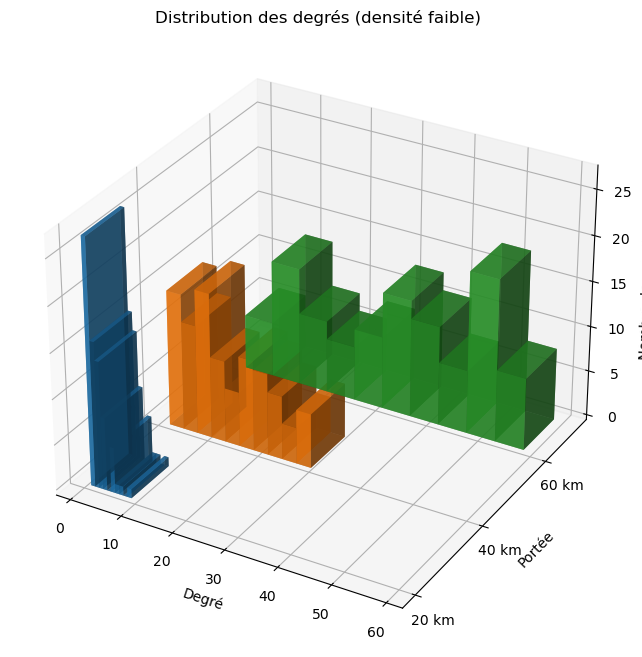

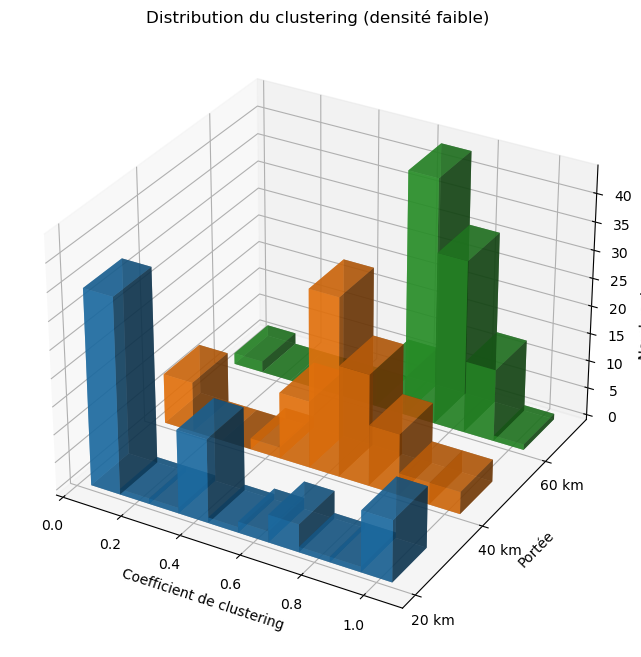

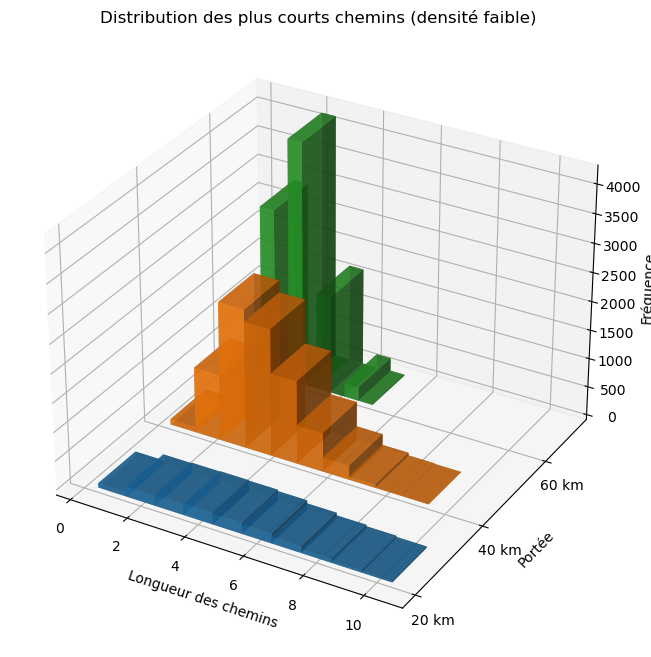

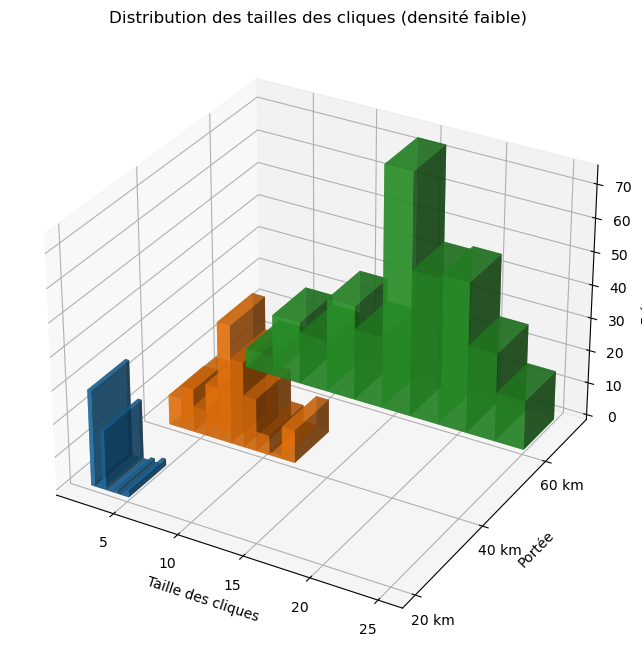

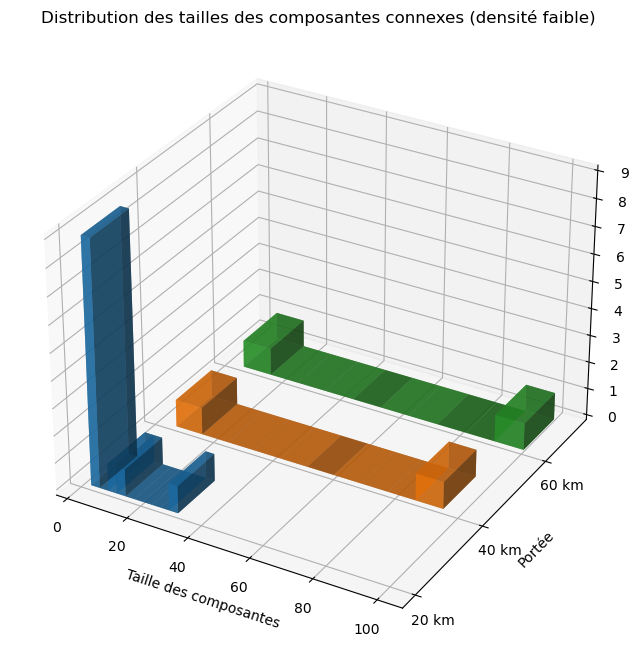

Analyse pour densité moyenne et portée 20 km :
Degré moyen:  4.070588235294117
Degré de clustering moyen:  0.4278988984871338
Degré de clustering :  0.5484949832775919
Nb cliques:  68
Nb composantes:  7
Longueur moyenne des chemins les plus courts:  5.05876615459644
Nombre des plus courts chemins:  4101
Analyse pour densité moyenne et portée 40 km :
Degré moyen:  17.36082474226804
Degré de clustering moyen:  0.6566514827552765
Degré de clustering :  0.6273069036226931
Nb cliques:  168
Nb composantes:  1
Longueur moyenne des chemins les plus courts:  2.7365288553512594
Nombre des plus courts chemins:  9409
Analyse pour densité moyenne et portée 60 km :
Degré moyen:  36.0
Degré de clustering moyen:  0.735382386130789
Degré de clustering :  0.7064292833444834
Nb cliques:  257
Nb composantes:  1
Longueur moyenne des chemins les plus courts:  1.9051117232935415
Nombre des plus courts chemins:  9801

Histogrammes 3D pour densité moyenne :


C:\Users\solal\AppData\Local\Temp\ipykernel_4208\1519115789.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


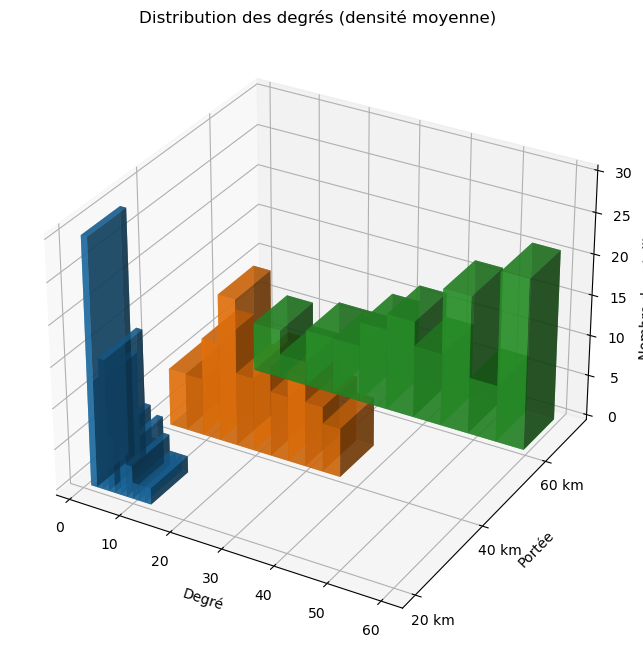

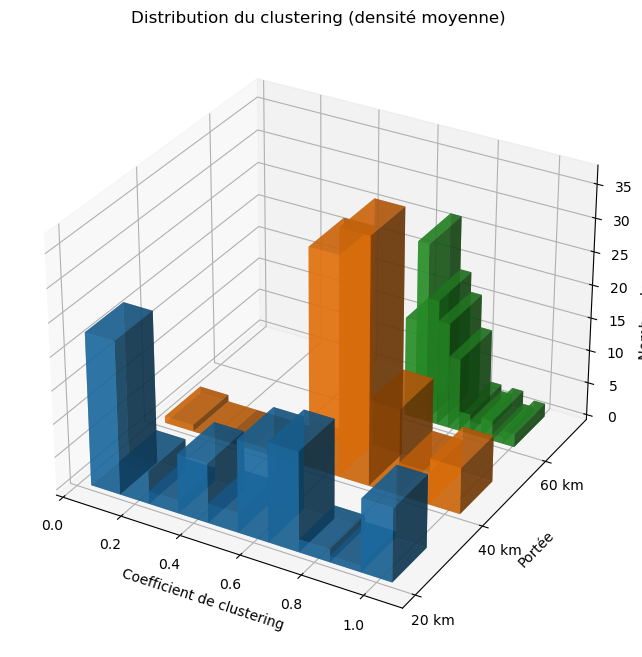

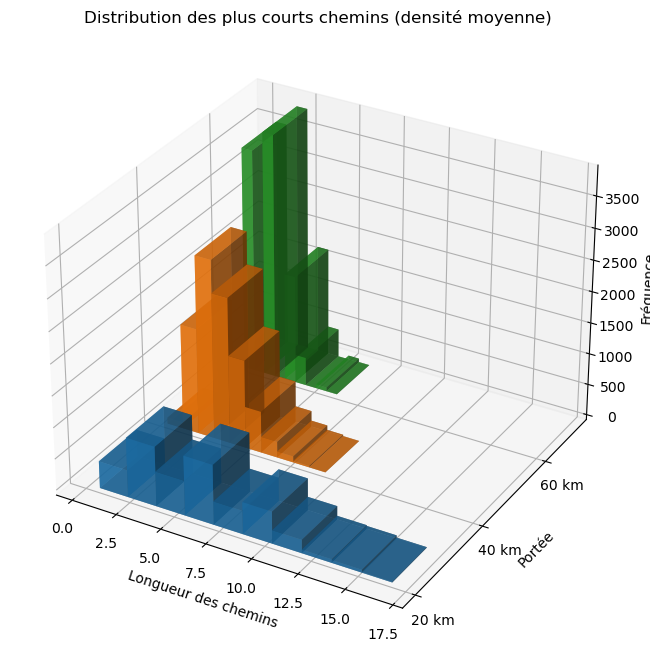

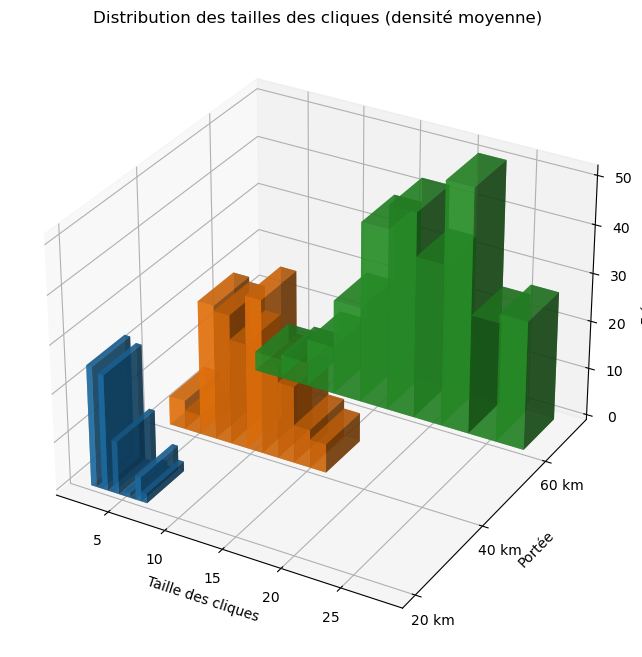

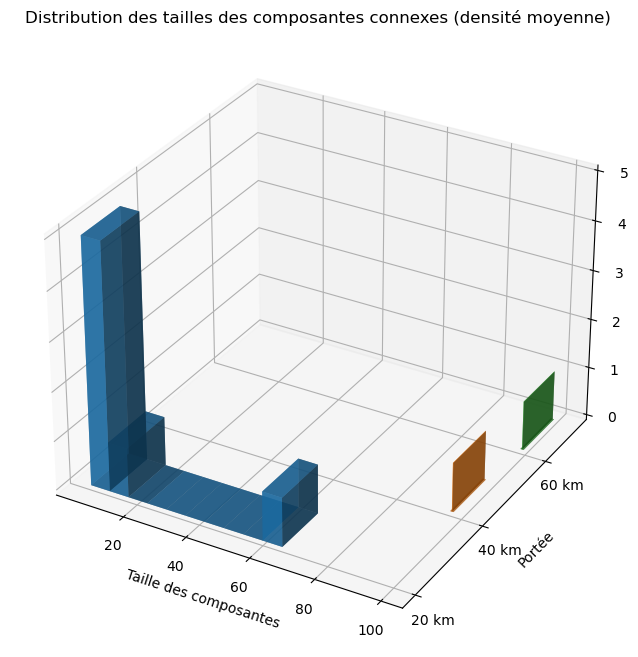

Analyse pour densité forte et portée 20 km :
Degré moyen:  4.376470588235295
Degré de clustering moyen:  0.46837763543645894
Degré de clustering :  0.48466257668711654
Nb cliques:  70
Nb composantes:  8
Longueur moyenne des chemins les plus courts:  4.0036505867014345
Nombre des plus courts chemins:  3835
Analyse pour densité forte et portée 40 km :
Degré moyen:  19.06122448979592
Degré de clustering moyen:  0.6786311398142605
Degré de clustering :  0.6697637377223254
Nb cliques:  137
Nb composantes:  2
Longueur moyenne des chemins les plus courts:  2.781127982646421
Nombre des plus courts chemins:  9220
Analyse pour densité forte et portée 60 km :
Degré moyen:  37.4
Degré de clustering moyen:  0.7280564598604691
Degré de clustering :  0.7442848716127557
Nb cliques:  200
Nb composantes:  2
Longueur moyenne des chemins les plus courts:  1.960241465445462
Nombre des plus courts chemins:  9608

Histogrammes 3D pour densité forte :


C:\Users\solal\AppData\Local\Temp\ipykernel_4208\1519115789.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


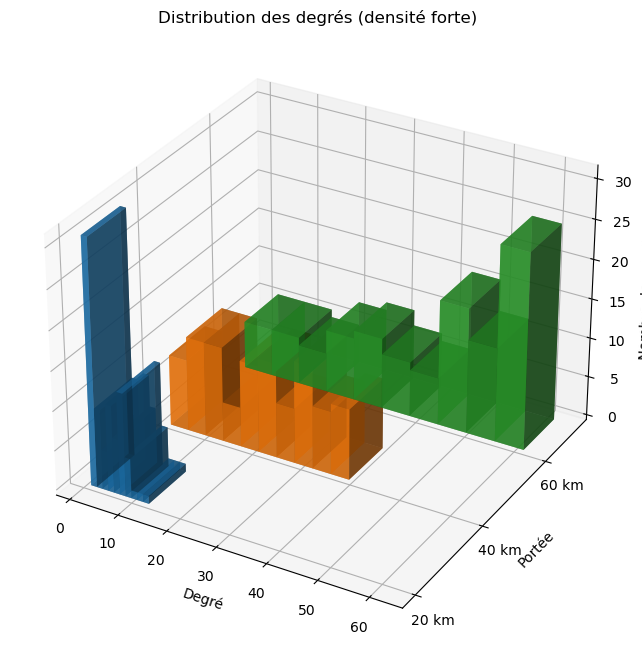

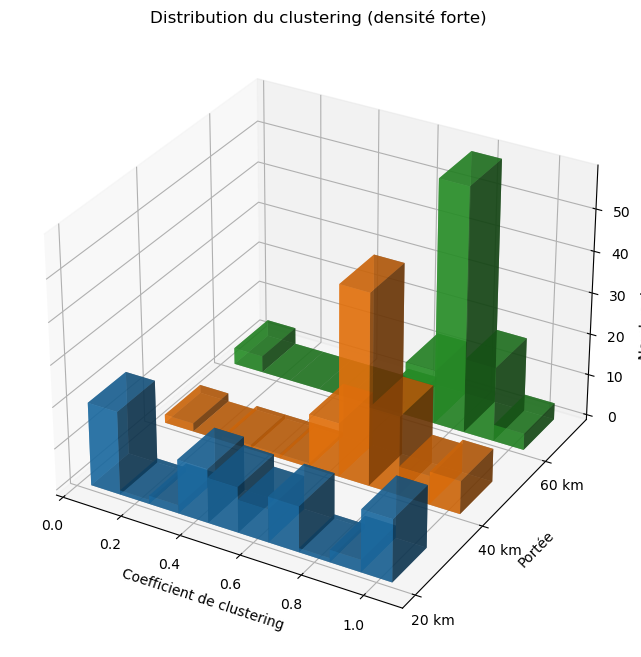

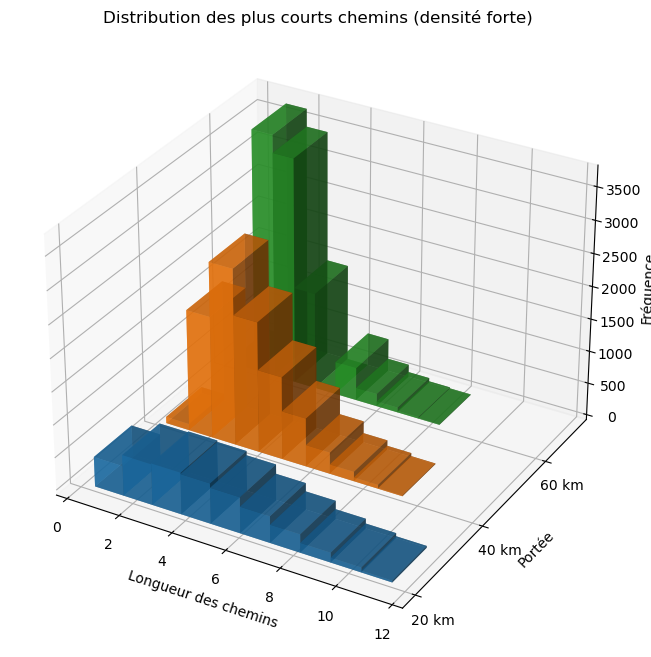

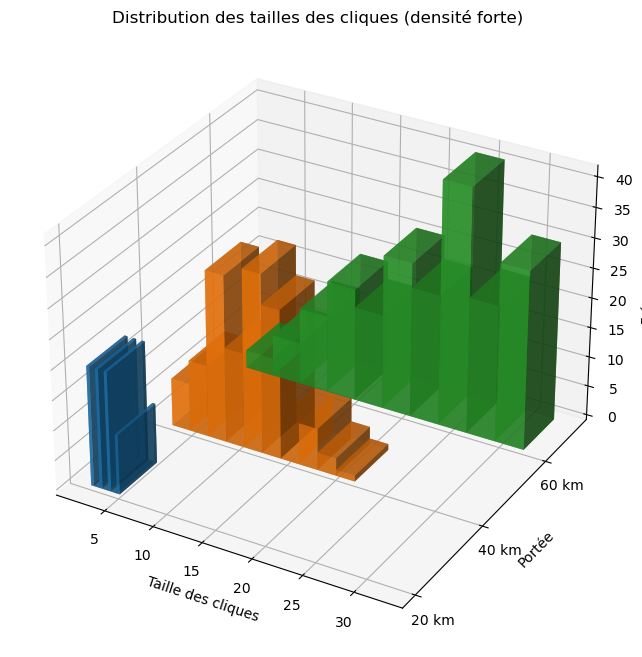

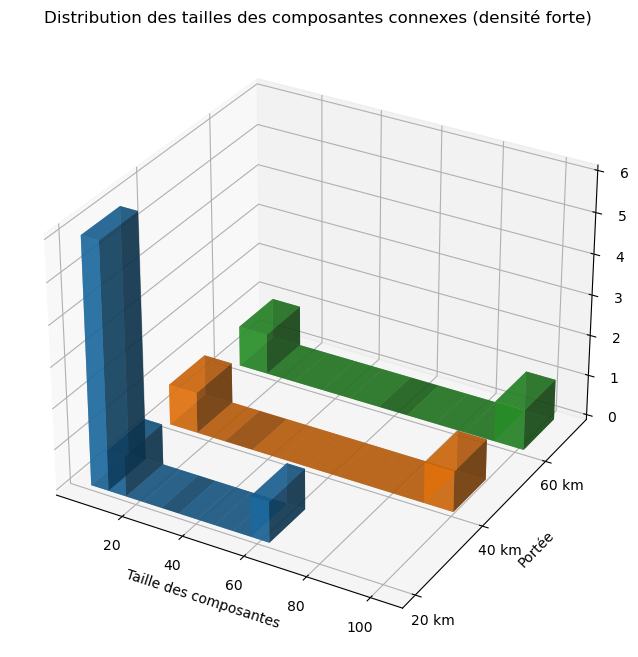

In [37]:
# Charger les fichiers
datasets = {
    "faible": "Topologies-20250110/topology_low.csv",
    "moyenne": "Topologies-20250110/topology_avg.csv",
    "forte": "Topologies-20250110/topology_high.csv"
}
portees = [20, 40, 60]

for densite, fichier in datasets.items():
    donnees = pd.read_csv(fichier)
    resultats_degres = {}
    resultats_clustering = {}
    resultats_chemins = {}
    resultats_cliques = {}
    resultats_composantes = {}

    for portee in portees:
        G = creer_graphe(donnees, portee)
        analyse = analyser_graphe_non_value(G)
        print(f"Analyse pour densité {densite} et portée {portee} km :")
        print("Degré moyen: ", np.mean(analyse["sequence_degres"]))
        print("Degré de clustering moyen: ", np.mean(analyse["coeff_clustering"]))
        print("Degré de clustering : ", analyse["clustering_global"])
        print("Nb cliques: ", len(analyse["tailles_cliques"]))
        print("Nb composantes: ", len(analyse["tailles_composantes"]))
        print("Longueur moyenne des chemins les plus courts: ", np.mean(analyse["longueurs_chemins"]))
        print("Nombre des plus courts chemins: ", len(analyse["longueurs_chemins"]))
        print("==============================================================================")

        if analyse is not None:
            resultats_degres[portee] = analyse["sequence_degres"]
            resultats_clustering[portee] = analyse["coeff_clustering"]
            resultats_chemins[portee] = analyse["longueurs_chemins"]
            resultats_cliques[portee] = analyse["tailles_cliques"]
            resultats_composantes[portee] = analyse["tailles_composantes"]

    print(f"\nHistogrammes 3D pour densité {densite} :")

    # Tracer les histogrammes 3D pour les degrés
    tracer_histogrammes_3d(
        resultats_degres, portees,
        titre=f"Distribution des degrés (densité {densite})",
        xlabel="Degré",
        ylabel="Portée",
        zlabel="Nombre de satellites"
    )

    # Tracer les histogrammes 3D pour le clustering
    tracer_histogrammes_3d(
        resultats_clustering, portees,
        titre=f"Distribution du clustering (densité {densite})",
        xlabel="Coefficient de clustering",
        ylabel="Portée",
        zlabel="Nombre de satellites"
    )

    # Tracer les histogrammes 3D pour les plus courts chemins
    tracer_histogrammes_3d(
        resultats_chemins, portees,
        titre=f"Distribution des plus courts chemins (densité {densite})",
        xlabel="Longueur des chemins",
        ylabel="Portée",
        zlabel="Fréquence"
    )

    # Tracer les histogrammes 3D pour les tailles de cliques
    tracer_histogrammes_3d(
        resultats_cliques, portees,
        titre=f"Distribution des tailles des cliques (densité {densite})",
        xlabel="Taille des cliques",
        ylabel="Portée",
        zlabel="Fréquence"
    )

    # Tracer les histogrammes 3D pour les tailles des composantes connexes
    tracer_histogrammes_3d(
        resultats_composantes, portees,
        titre=f"Distribution des tailles des composantes connexes (densité {densite})",
        xlabel="Taille des composantes",
        ylabel="Portée",
        zlabel="Fréquence"
    )

## Part 3

In [40]:
def analyser_graphe_value(G):
    if G.number_of_nodes() == 0:
        return None

    sequence_degres = [d for _, d in G.degree(weight='weight')]
    coeff_clustering = list(nx.clustering(G, weight='weight').values())
    chemins_plus_courts = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))
    longueurs_chemins = [longueur for dico_cible in chemins_plus_courts.values() for longueur in dico_cible.values()]
    cliques = list(nx.find_cliques(G))
    tailles_cliques = [len(clique) for clique in cliques]
    composantes_connexes = list(nx.connected_components(G))
    tailles_composantes = [len(comp) for comp in composantes_connexes]

    # Tracer l'histogramme de la distribution des plus courts chemins
    plt.figure(figsize=(10, 6))
    plt.hist(longueurs_chemins, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Distribution des plus courts chemins")
    plt.xlabel("Longueur des chemins")
    plt.ylabel("Fréquence")
    plt.show()

    return {
        "Longueur moyenne des chemins les plus courts: ": np.sqrt(np.mean(longueurs_chemins)),
        "Nombre des plus courts chemins: ": len(longueurs_chemins),
    }
    

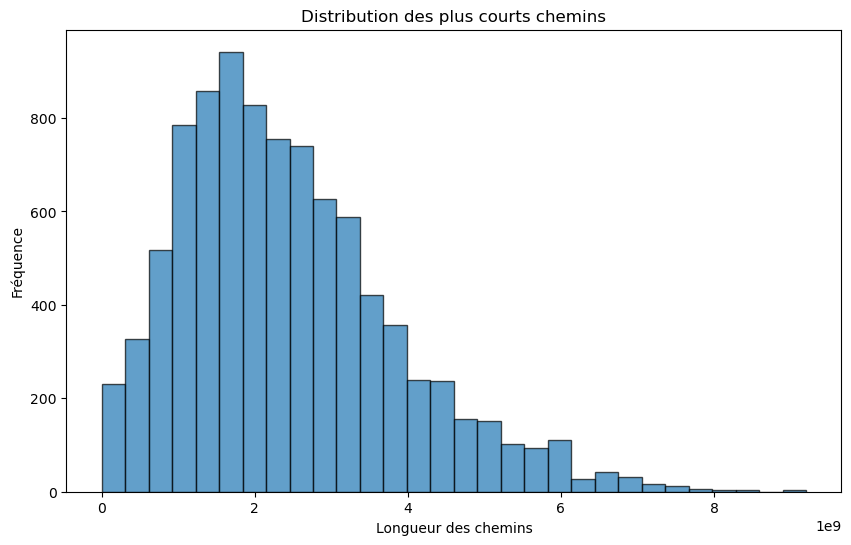


Résultats pour portée 60 km (graphe valué), densité: faible : {'Longueur moyenne des chemins les plus courts: ': 49314.64328947937, 'Nombre des plus courts chemins: ': 9220}


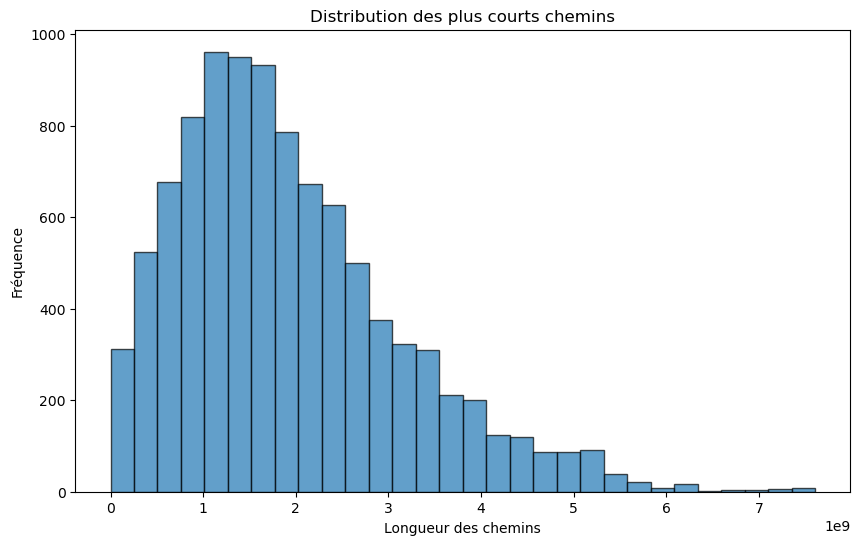


Résultats pour portée 60 km (graphe valué), densité: moyenne : {'Longueur moyenne des chemins les plus courts: ': 43892.056103800125, 'Nombre des plus courts chemins: ': 9801}


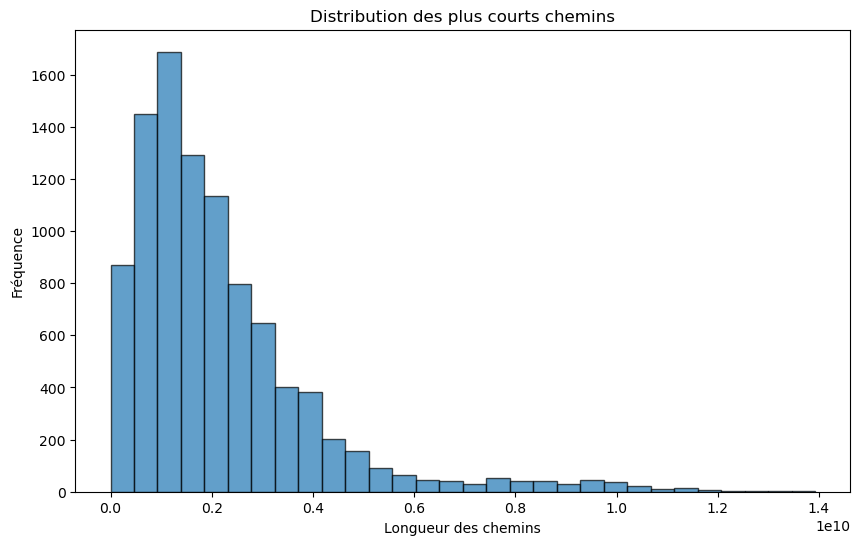


Résultats pour portée 60 km (graphe valué), densité: forte : {'Longueur moyenne des chemins les plus courts: ': 46460.308878360294, 'Nombre des plus courts chemins: ': 9608}


In [41]:
for densite, fichier in datasets.items():
    donnees = pd.read_csv(fichier)
    G = creer_graphe(donnees, 60)
    resultats_values = analyser_graphe_value(G)
    print(f"\nRésultats pour portée 60 km (graphe valué), densité: {densite} :", resultats_values)